Import Tools & Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Data Loading

In [160]:
data = pd.read_csv("Prostate_Cancer.csv")

Exploratory Data Analysis

In [161]:
data = data.drop(columns=['id'])
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [162]:
data.isnull().sum()

,0
diagnosis_result,0
radius,0
texture,0
perimeter,0
area,0
smoothness,0
compactness,0
symmetry,0
fractal_dimension,0


In [163]:
data.duplicated().sum()

0

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diagnosis_result   100 non-null    object 
 1   radius             100 non-null    int64  
 2   texture            100 non-null    int64  
 3   perimeter          100 non-null    int64  
 4   area               100 non-null    int64  
 5   smoothness         100 non-null    float64
 6   compactness        100 non-null    float64
 7   symmetry           100 non-null    float64
 8   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [165]:
data.describe()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [166]:
data['diagnosis_result'].value_counts()

,count
diagnosis_result,
M,62
B,38


In [167]:
encoder = LabelEncoder()
data['diagnosis_result'] = encoder.fit_transform(data['diagnosis_result'])

data['diagnosis_result'].value_counts()

,count
diagnosis_result,
1,62
0,38


Data Visualization

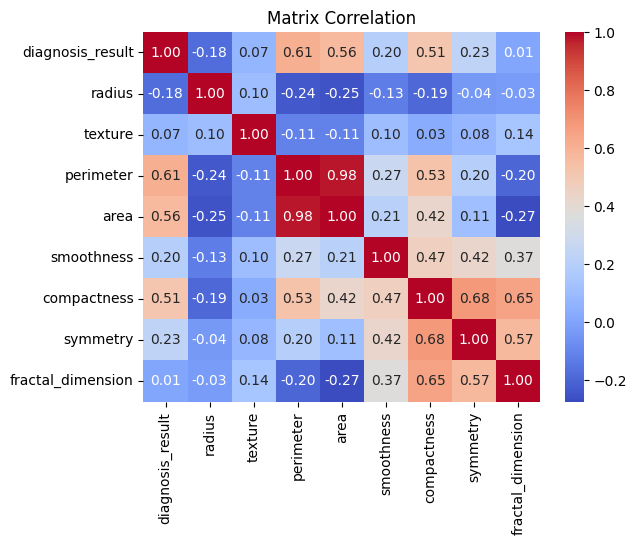

In [168]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrix Correlation")
plt.show()

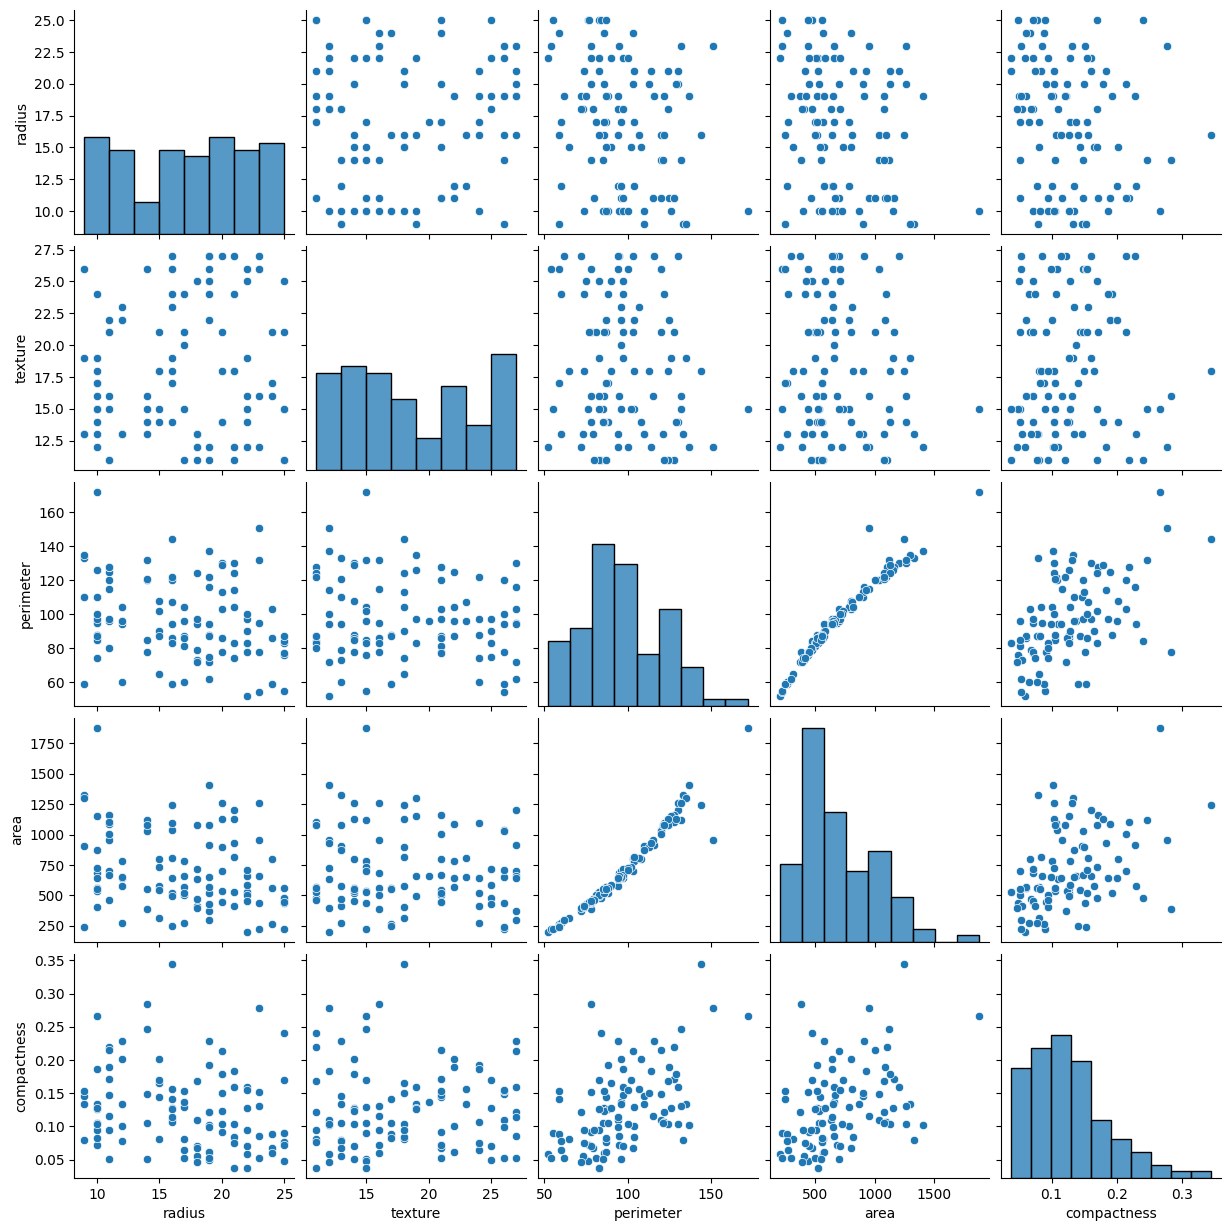

In [169]:
sns.pairplot(data[[
    'radius',
    'texture',
    'perimeter',
    'area',
    'compactness',
]])
plt.show()

Data Training

In [170]:
scaler = StandardScaler()
feature = data.drop(columns=['diagnosis_result'])
feature_scaled = scaler.fit_transform(feature)

X = feature_scaled
y = data['diagnosis_result']

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

def algorithm(X_train, X_test, y_train, y_test):
  models = {
      "Logistic Regression": LogisticRegression(max_iter = 1000),
      "K-Nearest Neighbors": KNeighborsClassifier(),
      "Support Vector Machine": SVC(probability = True),
      "Random Forest": RandomForestClassifier(random_state = 42),
      "Gradient Boosting": GradientBoostingClassifier(random_state = 42)
  }

  for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = {
        'Accuracy': accuracy,
        'Prediction': y_pred
    }

    print(f"{model_name} - Accuracy", accuracy)
    print(classification_report(y_test, y_pred))

In [173]:
algorithm(X_train, X_test, y_train, y_test)

Logistic Regression - Accuracy 0.85
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.88      0.94      0.91        16

    accuracy                           0.85        20
   macro avg       0.77      0.72      0.74        20
weighted avg       0.84      0.85      0.84        20

K-Nearest Neighbors - Accuracy 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.78      0.88      0.82        16

    accuracy                           0.70        20
   macro avg       0.39      0.44      0.41        20
weighted avg       0.62      0.70      0.66        20

Support Vector Machine - Accuracy 0.75
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.82      0.88      0.85        16

    accuracy                           0.75        20
   macro avg      

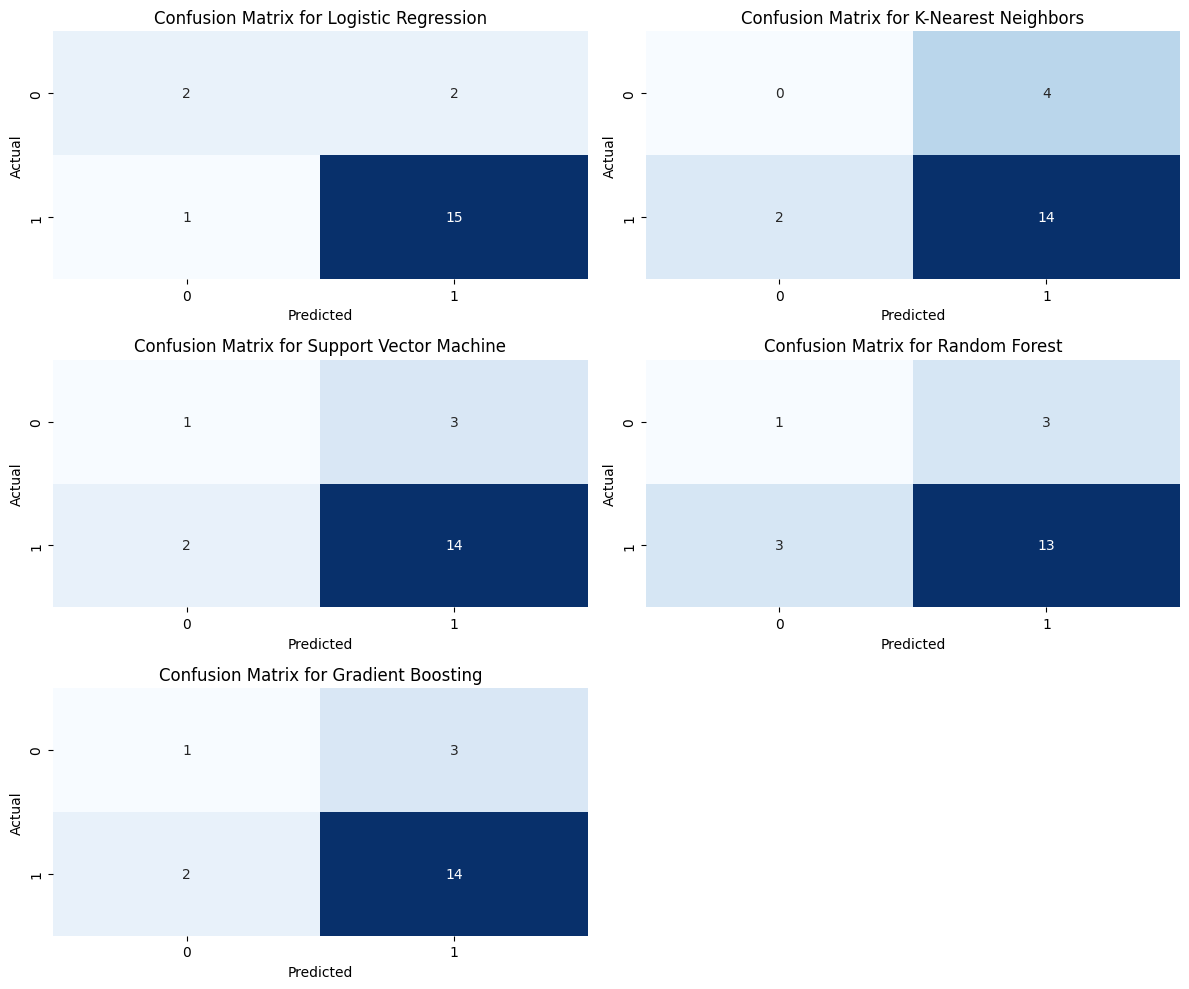

In [174]:
plt.figure(figsize=(12, 10))
for i, (model_name, result) in enumerate(results.items(), start=1):
        cm = confusion_matrix(y_test, result['Prediction'])
        plt.subplot(3, 2, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
plt.tight_layout()
plt.show()